# The Evolution of the NBA and the Meteoric Rise of the 3 point shot
In this project I will be exploring how the game of basketball played in the NBA has changed over the last 20 seasons. Specifically, I will be comparing 3 different periods of time to show the
insane growth of eFG% (effective field goal % measures how well a player shoots taking into consideration 3 pointers).

The goal of this end-to-end project was to demonstrate my ability to:
>1. Collect Data
>       - This was done through python using the unofficial nba_api
>       - Retrieved data on every player across 3 time periods within a 20 year range (2002, 2012, 2022)
>       - Collected a total of 6 data sets 
>2. Store Data
>       - For this project, I stored my data in csv files. 
>       - a SQL database would've been a better option if I wanted to scale the project in the future (i.e., data on all NBA seasons)
>3. Load Data
>       - Data was loaded into python through the pandas library which handles csv files very easily
>4. Manipulate Data
>       - Utilize the pandas library to process and clean the data
>       - This step included merging dataframes together since our desired info was spread across 2 different sets of data
>       - Adding variables to help with our analysis (eFG%, 3pt_ratio)
>       - Dropping non-aggregated rows to avoid double counting
>       - Re-mapping column data with dictionaries
>       - Formatting columns with list comprehensions and string manipulation
>5. Analyze Data for Insights
>       - Utilize matplotlib and seaborn libraries to create attractive visuals that tell a story
>       - Create scatter plots to show the relationship between eFG% and 3pt_ratio across the span of 20 years
>       - Summary statistics to show change between 2002 to 2022

## Collecting & Storing Data
I'm using the unofficial nba_api (https://github.com/swar/nba_api) to gather player stats (points, rebounds, shooting %s) and general info (positional data, first + last name) for every player that played in the 2002, 2012, 2022 seasons. This data will come from two endpoints in the API so I need to get a 2 different datasets for each of the 3 seasons which is a total of 6 datasets.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
from pandas import DataFrame
from nba_api.stats.static import players, teams
from nba_api.stats.endpoints import commonplayerinfo
from nba_api.stats.endpoints import playercareerstats
import time
from os import path

DATA_DIR = 'C:/Users/Jordan Chen/code_basketball/basketball_files/data'

In [16]:
# Retrieve only active players to use for our 2022 data set. Helps speed up the process so I dont have to iterate through 
# every id of every player in history
nba_players = players.get_active_players()
players_df = pd.DataFrame(nba_players)
active_player_ids = players_df['id'].to_list()

# Retrieve all players to have played in the NBA. Use this if you want player ids for EVERY player in history
all_players = players.get_players()
all_players_df = pd.DataFrame(all_players)
all_players = all_players_df['id'].to_list()

In [17]:
# Using the above list works for getting the 2002 and 2012 data but is painfully slow since we are requesting from 
# an API. Instead of looping through the list of every single nba player in history (4700 players) and checking 
# if they played in 2002 or 2012, Im going to speed up the process and use a csv I made with a list of both the 2002
# and 2012 players found online
df_names_2002_and_2012 = pd.read_csv(path.join(DATA_DIR, '2002_2012_player_list.csv' ))
df_names_2002_and_2012.head()

# seperate the 2002 players into individual list 
df_names_2002 = df_names_2002_and_2012['2002']
df_names_2002.dropna(inplace=True)
names_2002 = df_names_2002.to_list()

# repeat for 2012. 
df_names_2012 = df_names_2002_and_2012['2012']
df_names_2012.dropna(inplace=True)
names_2012 = df_names_2012.to_list()

In [19]:
# Getting list of ids for players that played in the 2002-03 season through the nba api
ids_2002 = []
for name in names_2002:
    append_df = all_players_df[all_players_df['full_name'] == name]
    if append_df.empty:
        print(f"{name} was not found")
    ids_2002.append(append_df)
# altered the names that werent found so they map to an id in the API
leftovers_2002 = ['Predrag Drobnjak',
'Anfernee Hardaway',
'Roger Mason Jr.',
'Mengke Bateer',
"Mamadou N'diaye",
'Nene',
'Clifford Robinson',
'Charles Smith',
'Steven Smith',
'Maurice Taylor',
'Wang Zhi-zhi',
'Clar. Weatherspoon',
'Frank Williams']
# run it once more for excluded players
for name in leftovers_2002:
    append_df = all_players_df[all_players_df['full_name'] == name]
    if append_df.empty:
        print(f"{name}")
    ids_2002.append(append_df)
#combine into a single dataframe
ids_2002_df = pd.concat(ids_2002, ignore_index=True)
# drop duplicates for players with similar names
ids_2002_df = ids_2002_df.drop_duplicates(subset= ['id'], keep='first')
# Turn the id column into a list
ids_2002_list = ids_2002_df['id'].to_list()


Peja Drobnjak was not found
Penny Hardaway was not found
Roger Mason was not found
Bateer Mengke was not found
Mamadou N'Diaye was not found
Maybyner Nene was not found
Cliff Robinson was not found
Charles Cornelius Smith was not found
Steve Smith was not found
Mo Taylor was not found
Zhizhi Wang was not found
Clarence Weatherspoon was not found
Frankie Williams was not found


In [20]:
# Repeat this step for players in the 2012-13 season
ids_2012 = []
for name in names_2012:
    append_df = all_players_df[all_players_df['full_name'] == name]
    if append_df.empty:
        print(f"{name} was not found")
    ids_2012.append(append_df)

leftovers_2012 = ['JJ Hickson',
'Perry Jones III',
'Roger Mason Jr.',
'CJ Miles',
'Marcus Morris Sr.',
'AJ Price',
'JJ Redick',
'JR Smith',
'DJ White']

for name in leftovers_2012:
    append_df = all_players_df[all_players_df['full_name'] == name]
    if append_df.empty:
        print(f"{name}")
    ids_2012.append(append_df)
#combine into a single dataframe
ids_2012_df = pd.concat(ids_2012, ignore_index=True)
# drop duplicates for players with similar names
ids_2012_df = ids_2012_df.drop_duplicates(subset= ['id'], keep='first')
# Turn the id column into a list
ids_2012_list = ids_2012_df['id'].to_list()


J.J. Hickson was not found
Perry Jones was not found
Roger Mason was not found
C.J. Miles was not found
Marcus Morris was not found
Maybyner Nene was not found
A.J. Price was not found
J.J. Redick was not found
J.R. Smith was not found
D.J. White was not found


In [12]:
# Creating a function to retrieve player stats for a specific season with the API
def get_season_stats(ids_list, season_id):
    df_list = []
    for id in ids_list:
        player_career = playercareerstats.PlayerCareerStats(player_id=id, timeout=60)
        player_df = player_career.get_data_frames()[0]
        df = player_df[player_df['SEASON_ID'] == season_id]
        if not df.empty:
            df_list.append(df)
        time.sleep(0.75)
    return pd.concat(df_list, ignore_index=True)

In [26]:
# Creating a function to retrieve players position and name for a specific season with the API
def get_season_pos(ids_list):
    df_post_list = []
    for id in ids_list:
        player_pos = commonplayerinfo.CommonPlayerInfo(player_id = id, timeout=60)
        df_player_pos = player_pos.get_data_frames()[0]
        df_post_list.append(df_player_pos)
        time.sleep(0.75)
    return pd.concat(df_post_list, ignore_index=True)

In [ ]:
# Retrieve player stats and position data for 2002
df_player_stats_2002 = get_season_stats(ids_2002_list,'2002-03')
df_player_pos_2002 = get_season_pos(ids_2002_list)
# save static copies as csvs
df_player_stats_2002.to_csv(path.join(DATA_DIR, '2002_season_player_stats.csv'), index=False)
df_player_pos_2002.to_csv(path.join(DATA_DIR, 'player_positions_2002.csv'), index=False)

# Repeat for 2012
df_player_stats_2012 = get_season_stats(ids_2012_list, '2012-13')
df_player_pos_2012 = get_season_pos(ids_2012_list)
df_player_stats_2012.to_csv(path.join(DATA_DIR, '2012_season_player_stats.csv'), index=False)
df_player_pos_2012.to_csv(path.join(DATA_DIR, 'player_positions_2012.csv'), index=False)

# Repeat for 2022
df_player_stats_2022 = get_season_stats(active_player_ids, '2022-23')
df_player_pos_2022 = get_season_pos(active_player_ids)
df_player_stats_2022.to_csv(path.join(DATA_DIR, '2022_season_player_stats.csv'), index=False)
df_player_pos_2022.to_csv(path.join(DATA_DIR, 'player_positions_2022.csv'), index=False)

## Processing and cleaning

Now that we have all the raw data that we need saved in csvs we can start cleaning and preparing it for analysis.

In [41]:
# Loading in the saved csv files for player stats and positions. 
df_stats_2002 = pd.read_csv(path.join(DATA_DIR, '2002_season_player_stats.csv'))
df_pos_2002 = pd.read_csv(path.join(DATA_DIR, 'player_positions_2002.csv'))

df_stats_2012 = pd.read_csv(path.join(DATA_DIR, '2012_season_player_stats.csv'))
df_pos_2012 = pd.read_csv(path.join(DATA_DIR, 'player_positions_2012.csv'))

df_stats_2022 = pd.read_csv(path.join(DATA_DIR, '2022_season_player_stats.csv'))
df_pos_2022 = pd.read_csv(path.join(DATA_DIR, 'player_positions_2022.csv'))
# function that merges the stats and position dataframes together 
# while only keeping 4 relevant columns from the position dataframe
def merge_position_stats(pos_df, stats_df):
    df_pos_season = pos_df[['PERSON_ID','FIRST_NAME', 'LAST_NAME', 'POSITION']]
    return pd.merge(df_pos_season, stats_df, left_on='PERSON_ID', right_on='PLAYER_ID')

df_2002_merged = merge_position_stats(df_pos_2002, df_stats_2002)
df_2012_merged = merge_position_stats(df_pos_2012, df_stats_2012)
df_2022_merged = merge_position_stats(df_pos_2022, df_stats_2022)


In [42]:
# concat all 3 merged dfs into a single df that we will use for analysis
df = pd.concat([df_2002_merged, df_2012_merged, df_2022_merged], ignore_index=True)
df.to_csv(path.join(DATA_DIR, 'Player_stats_2002_2012_2022_season.csv'), index=False)
# 1600 rows. no rows were lost
df.shape

(1600, 31)

In [43]:
# lowercase all column headings. this is just my preference as I find it easier to access columns later on.
df.columns = [x.lower() for x in df.columns]
df.columns

Index(['person_id', 'first_name', 'last_name', 'position', 'player_id',
       'season_id', 'league_id', 'team_id', 'team_abbreviation', 'player_age',
       'gp', 'gs', 'min', 'fgm', 'fga', 'fg_pct', 'fg3m', 'fg3a', 'fg3_pct',
       'ftm', 'fta', 'ft_pct', 'oreb', 'dreb', 'reb', 'ast', 'stl', 'blk',
       'tov', 'pf', 'pts'],
      dtype='object')

In [44]:
# drop duplicate column leftover from the merge and redundant column
df.drop(columns=['person_id', 'league_id'], inplace=True)

In [45]:
# Create a dictionary to map out our replacement positions for players with 2 listed positions.
# We take the first one as the primary.
df['position'].value_counts()
replacement_dict = {'Forward-Center': 'Forward',
                    'Forward-Guard': 'Forward',
                    'Guard-Forward': 'Guard',
                    'Center-Forward': 'Center'
                    }
df['position'] = df['position'].replace(replacement_dict)

In [34]:
# Players that were on multiple teams through-out a season have a row of data for each team and an aggregate row,
# we want to drop all duplicates of a (player_id & season_id) occurence except the last occurence which stores 
# the aggregate values as TOT in the team column
df.drop_duplicates(subset=['player_id', 'season_id'], keep='last', inplace=True)
df.shape ## 1600 original rows, 271 rows of non-aggregate rows dropped

(1329, 29)

In [46]:
# Our season_ids are in the format of 2002-03, we want to change this to just 2002
df['season_id'] = df['season_id'].str[:4]

In [47]:
# creating columns for effective field goal %, 3 point shooting ratio, and true shooting %
df['efg_pct'] = round((df['fgm'] + (0.5 * df['fg3m'])) / df['fga'], 3)
df['fg3a_ratio'] = round(df['fg3a'] / df['fga'], 3)
df['ts_pct'] = round(df['pts'] / (2 * (df['fga'] + 0.44 * df['fta'])), 3)

In [48]:
df_50_min_gp = df[df['gp'] >= 50]
df_50_min_gp.head()

,first_name,last_name,position,player_id,season_id,team_id,team_abbreviation,player_age,gp,gs,...,reb,ast,stl,blk,tov,pf,pts,efg_pct,fg3a_ratio,ts_pct
1,Shareef,Abdur-Rahim,Forward,949,2002,1610612737,ATL,26.0,81,81,...,677,242,87,38,212,240,1608,0.487,0.051,0.566
2,Courtney,Alexander,Guard,2042,2002,1610612740,NOH,26.0,66,7,...,118,79,31,6,68,125,523,0.401,0.113,0.459
3,Malik,Allen,Forward,2124,2002,1610612748,MIA,25.0,80,73,...,425,54,37,78,128,234,767,0.424,0.005,0.455
6,Ray,Allen,Guard,951,2002,0,TOT,27.0,76,75,...,381,334,103,14,198,220,1713,0.512,0.391,0.565
8,John,Amaechi,Forward,680,2002,1610612762,UTA,32.0,50,1,...,77,21,14,7,34,50,99,0.314,0.000,0.351


## Analysis
The graphic below shows the staggering growth of both efficiency (measured through eFG%) and 3 point shooting.
To help you better understand, the average center in 2002 had an eFG% of approx 48%, in 2022 all 3 positions had a higher average eFG% than that. (centers are known to have very high eFG% due to their shot selection being very close to the basket)

Moreover, the 3 point shooting ratio (fg3a_ratio) has increased from a league-wide average of 15.8% to an astounding 39.7% in 20 years while the average eFG% increased from 44.3% to 54.5% as shown below
and this trend has no signs of slowing down. 

Teams have realized that 3 point shots are more efficient than 2 point shots. Even though the 3 pointer is an objectively harder shot, teams have found that it leads to more points per possession.
Another factor to consider is that players in general have just gotten *better* at shooting -- that is to say players in the modern era are more skilled than ever before. Now a part of this could be that teams advocating for more 3 pointers has resulted in a "natural selection" of sorts where poor shooters are slowly phased out of rosters and the league. However I would argue that we are now in a era where its not uncommon to see 7ft centers shooting the 3 ball in large volumes with decent shooting percentages. Clearly modern players are learning to adapt and add new skills to their arsenal.



Text(0.5, 1.15, 'Explosive Growth of Efficiency in the NBA')

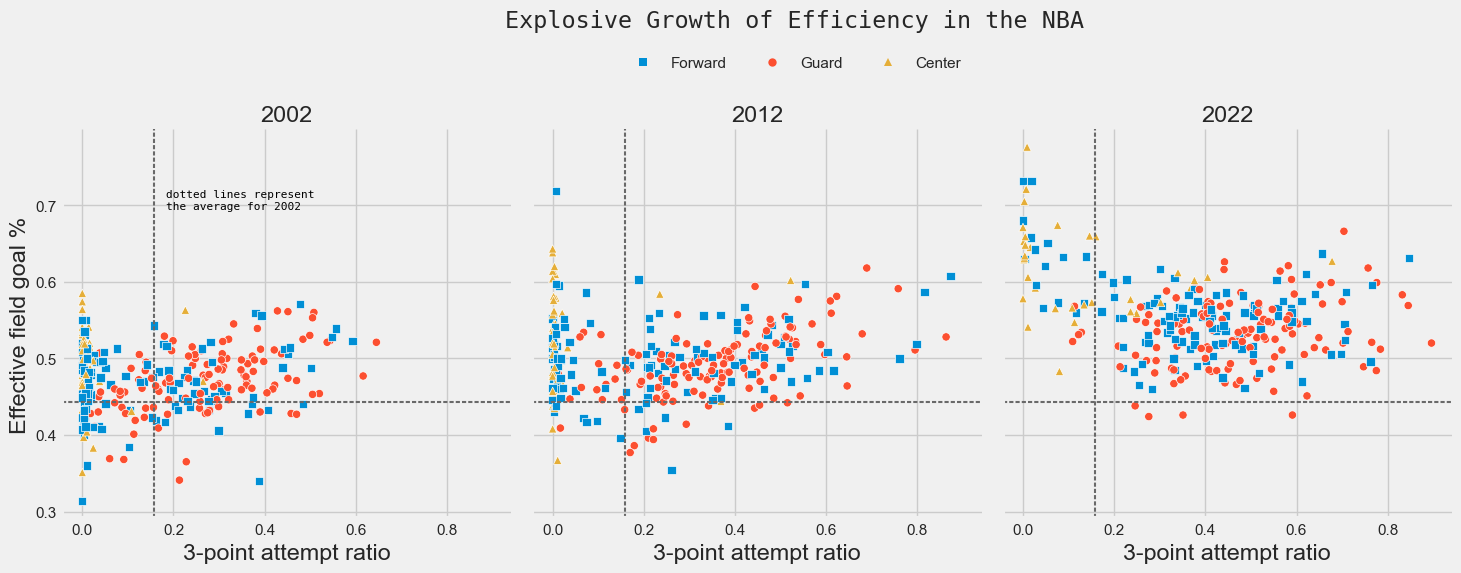

In [519]:
# Creating the scatter plot
marker_dict = {'Guard': 'o', 'Forward': 's', 'Center': '^'} 
plt.style.use('fivethirtyeight')
g = sns.relplot(x='fg3a_ratio', y='efg_pct', col='season_id', hue='position', style='position', markers=marker_dict, data=df_50_min_gp)
sns.move_legend(g, "lower center", bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False)
(g.map(plt.axhline, y= 0.443, color='dimgrey', dashes=(2,1), lw=1.5)
 .map(plt.axvline, x= 0.158, color='dimgrey', dashes=(2,1), lw=1.5)
 .set_axis_labels('3-point attempt ratio', 'Effective field goal %')
 .set_titles("{col_name}").tight_layout())
g.figure.text(0.11, 0.75, 'dotted lines represent\nthe average for 2002', fontsize=8, color='black', fontdict={'family': 'monospace'})
g.figure.suptitle("Explosive Growth of Efficiency in the NBA", y=1.15, fontdict={'family': 'monospace'})

In [487]:
df_50_min_gp.groupby(['position','season_id']).agg({
    'efg_pct': 'mean',
    'fg3a_ratio': 'mean',
    'fg_pct': 'mean',
    'fg3a': 'sum',
    })[['efg_pct', 'fg3a_ratio', 'fg_pct', 'fg3a']]

efg_pct  fg3a_ratio    fg_pct   fg3a
position season_id                                       
Center   2002       0.483149    0.018213  0.480383    467
         2012       0.516558    0.026115  0.511942    565
         2022       0.614970    0.131303  0.592364   2846
Forward  2002       0.467283    0.142417  0.443200  11250
         2012       0.496483    0.225283  0.456725  14915
         2022       0.556670    0.376913  0.490000  25166
Guard    2002       0.471167    0.272719  0.423263  21021
         2012       0.492173    0.358016  0.426992  28326
         2022       0.533254    0.472425  0.446358  42320

The league wide 3-point attempt ratio has gone from 15.8% in 2002 to 39.7% 2022. Just under 40% of all shots in the NBA are now taken from the 3-point line!

In [494]:

df.groupby('season_id').agg({
    'fg3a_ratio': 'mean',
    'efg_pct': 'mean',
    'fg3_pct': 'mean'
})

,fg3a_ratio,efg_pct,fg3_pct
season_id,,,
2002,0.158450,0.443375,0.211593
2012,0.237798,0.473892,0.241555
2022,0.397440,0.545818,0.324512


Only the Denver Nuggets took less than 1/3rd of their **total** shots from the 3 point line in 2022 at a slightly lower 32.7%. Funnily enough, the Denver Nuggets **won** the championship that year.
However, regular season metrics are not always indicative of playoff success (*in that same year, the 8th seed Miami heat ended up upsetting the 1st and 2nd seed*) so I would refrain from extrapolating too much.

For comparison, there were 59 teams (29 in 2002 and 30 in 2012) that did not shoot 1/3rd of their shots from 3. The game is totally different in the modern NBA

In [67]:
df_2022_season = df[df['season_id'] == '2022']
df_2022_season = df_2022_season.groupby('team_abbreviation').agg({
                                        'fg3a_ratio': 'mean',
                                        'efg_pct': 'mean',
                                        'fg3_pct': 'mean'
                                        })
df_2022_season.sort_values(by=['efg_pct'], ascending=False)
df_2022_season[df_2022_season['fg3a_ratio'] < 0.33]

,fg3a_ratio,efg_pct,fg3_pct
team_abbreviation,,,
DEN,0.32725,0.560688,0.393625


In [100]:
df_2022_season = df[((df['season_id'] == '2002') | (df['season_id'] == '2012')) & (df['team_abbreviation'] != 'TOT')]
df_2022_season = df_2022_season.groupby(['team_abbreviation', 'season_id']).agg({
                                        'fg3a_ratio': 'mean',
                                        'efg_pct': 'mean',
                                        'fg3_pct': 'mean'
                                        })
print(f"{df_2022_season[df_2022_season['fg3a_ratio'] < 0.33].shape[0]} teams shot less than 1/3rd of their shots from 3 in 2002 and 2012 combined")

59 teams shot less than 1/3rd of their shots from 3 in 2002 and 2012 combined


If we look into this change from an individual player level, Brook Lopez is the perfect example.

Brook Lopez AKA "Splash Mountain" is a Center known for his impressive shooting ability. But he wasnt always known for this.
in the 2016 season you can see his 3-point attempt ratio shoot up to above 30%. If you took the total attempts from his first 8 seasons, thats stil 12x less than his attempts in the 2016 season alone.

This is only one example of a player who learned to adapt and change alongside the league.

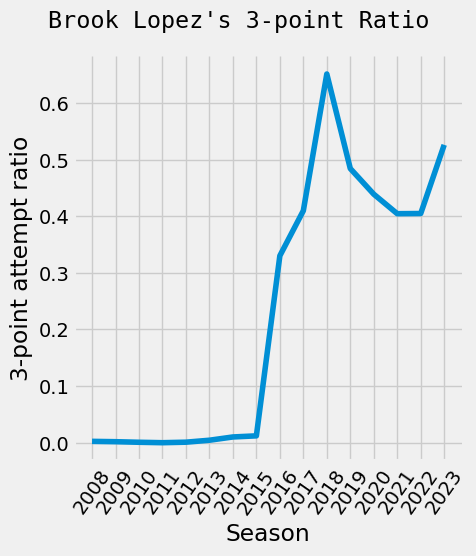

In [88]:

lopez_df = playercareerstats.PlayerCareerStats(player_id=201572)
lopez_df = lopez_df.get_data_frames()[0]
lopez_df['fg3a_ratio'] = lopez_df['FG3A']/ lopez_df['FGA']
lopez_df['SEASON_ID'] = lopez_df['SEASON_ID'].str[:4]
# plotting his 3 point ratio
g = sns.relplot(x='SEASON_ID', y='fg3a_ratio', kind='line', data=lopez_df)
plt.style.use('fivethirtyeight')
(g.set_axis_labels('Season', '3-point attempt ratio')
.tick_params(axis='x', rotation=55))
g.figure.suptitle("Brook Lopez's 3-point Ratio", y=1.05, fontdict={'family': 'monospace'})
g.figure.align_labels()